In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('Banglore_traffic_Dataset.csv',parse_dates=['Date'])

#### A Quick Glance At The Data

In [4]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [5]:
df.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

In [7]:
df.shape

(8936, 16)

In [6]:
df.describe()

,Date,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
count,8936,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,2023-04-22 05:25:11.548791552,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348
min,2022-01-01 00:00:00,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000
25%,2022-08-26 00:00:00,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000
50%,2023-04-24 00:00:00,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000
75%,2023-12-17 06:00:00,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000
max,2024-08-09 00:00:00,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000
std,NaN,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8936 non-null   datetime64[ns]
 1   Area Name                           8936 non-null   object        
 2   Road/Intersection Name              8936 non-null   object        
 3   Traffic Volume                      8936 non-null   int64         
 4   Average Speed                       8936 non-null   float64       
 5   Travel Time Index                   8936 non-null   float64       
 6   Congestion Level                    8936 non-null   float64       
 7   Road Capacity Utilization           8936 non-null   float64       
 8   Incident Reports                    8936 non-null   int64         
 9   Environmental Impact                8936 non-null   float64       
 10  Public Transport Usage  

as we can see there are no null values

checking for duplicated values

In [8]:
df.duplicated().sum()

0

### MEASURING PEAK TRAFFIC

#### DAY WISE TRAFFIC TRENDS

In [9]:
#parasing day name 
df['day'] = df['Date'].dt.day_name()
#calculating mean of traffic volume by day
traffic = df.groupby('day')['Traffic Volume'].mean().reset_index()


In [10]:
traffic.info

<bound method DataFrame.info of          day  Traffic Volume
0     Friday    28842.780527
1     Monday    29510.237654
2   Saturday    29062.983721
3     Sunday    29105.277516
4   Thursday    29530.357600
5    Tuesday    28911.255157
6  Wednesday    29697.560821>

In [11]:
#since the days are in alphabetic order changing them into systematic order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
traffic['day'] = pd.Categorical(traffic['day'], categories=day_order , ordered=True)
traffic = traffic.sort_values('day')


In [12]:
traffic.info

<bound method DataFrame.info of          day  Traffic Volume
1     Monday    29510.237654
5    Tuesday    28911.255157
6  Wednesday    29697.560821
4   Thursday    29530.357600
0     Friday    28842.780527
2   Saturday    29062.983721
3     Sunday    29105.277516>

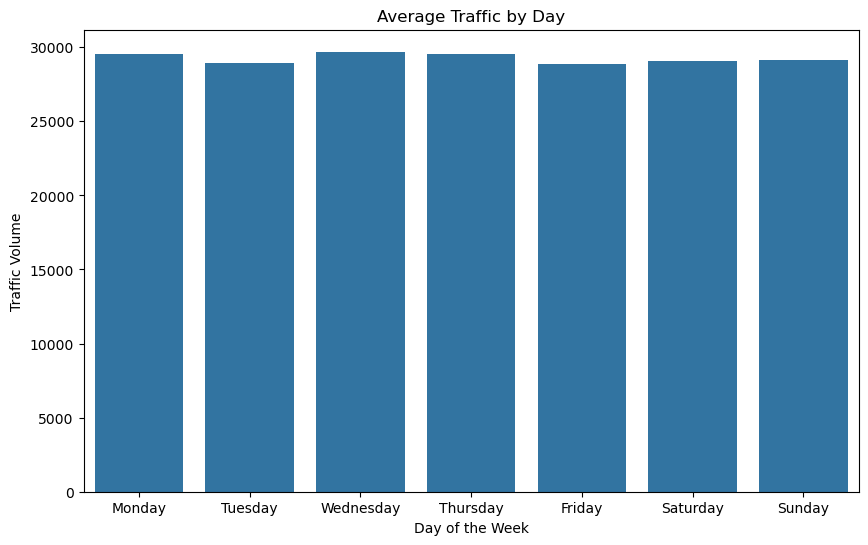

In [13]:
# making a barplot out of obtained results
fig = plt.figure(figsize=(10,6))

sns.barplot(data=traffic, x='day', y='Traffic Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic by Day')

plt.show()


Wednesday has the day with the highest traffic volume, followed by Thursday and Monday, while Friday recorded the lowest traffic

#### COMPARING TRAFFIC ON WEEKDAYS VS WEEKENDS

In [14]:
#classifying days into weekdays or weekends
df['weekday_or_weekend'] = df['day'].apply(lambda x:'weekend' if x in ['Saturday','Sunday'] else 'weekday')
#calculating mean trafffic by weekday or weekend
Weekly_traffic = df.groupby('weekday_or_weekend')['Traffic Volume'].mean().reset_index()


In [15]:
Weekly_traffic.info

<bound method DataFrame.info of   weekday_or_weekend  Traffic Volume
0            weekday    29297.170380
1            weekend    29083.982045>

Text(0.5, 1.0, 'Average Traffic in a week')

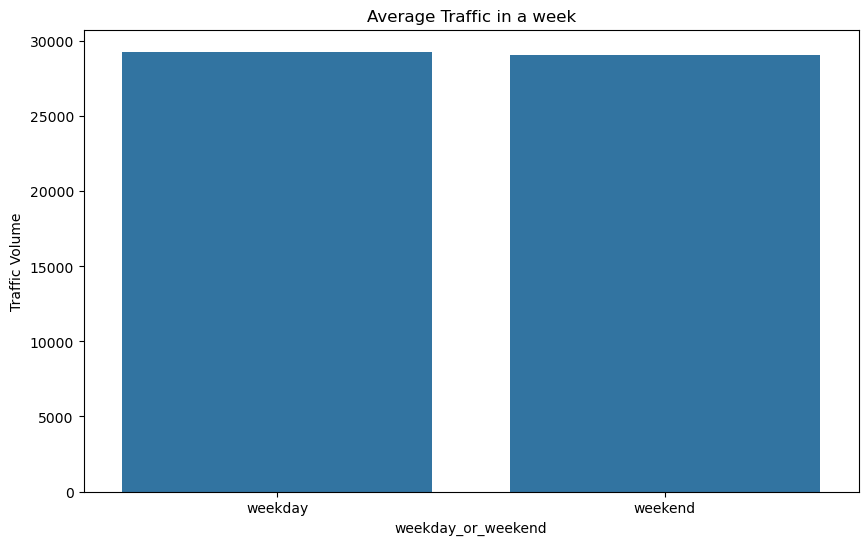

In [16]:
fig= plt.figure(figsize=(10,6))

sns.barplot(data=Weekly_traffic, x='weekday_or_weekend', y='Traffic Volume')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic in a week')

Traffic volume tends to be slightly higher on weekdays compared to weekends

#### SEASONAL TRAFFIC TRENDS

In [17]:
#parasing month name 
df['month'] = df['Date'].dt.month_name()
#calculating mean of traffic volume by month
traffic_by_month = df.groupby('month')['Traffic Volume'].mean().reset_index()

month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
traffic_by_month['month'] = pd.Categorical(traffic_by_month['month'], categories=month_order , ordered=True)
traffic_by_month = traffic_by_month.sort_values('month')
traffic_by_month.info

<bound method DataFrame.info of         month  Traffic Volume
4     January    28830.116122
3    February    29147.926860
7       March    29515.959368
0       April    29573.885327
8         May    28926.727166
6        June    29741.802145
5        July    28875.460157
1      August    29504.121739
11  September    29083.165171
10    October    29380.753333
9    November    29302.754325
2    December    28952.187273>

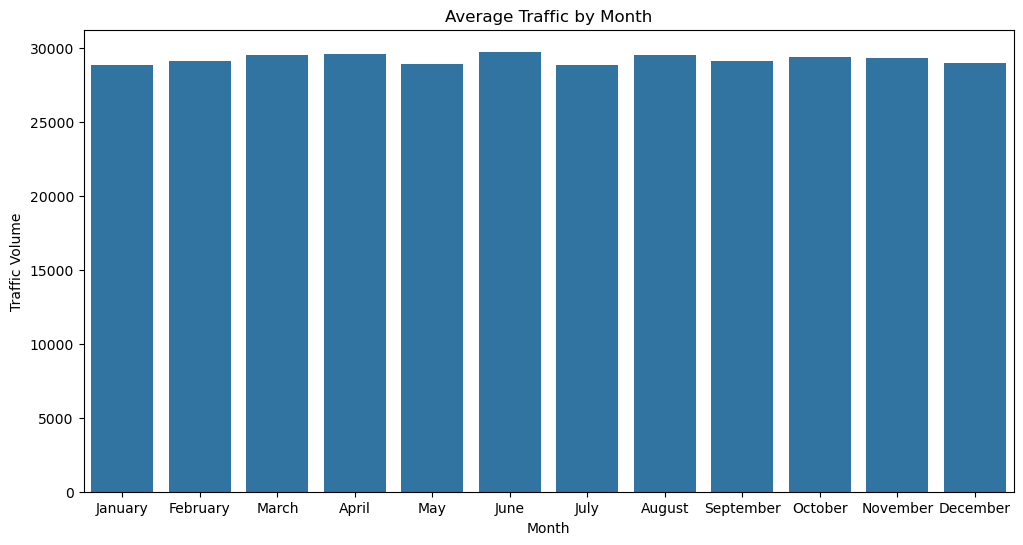

In [18]:

# making a barplot out of obtained results
fig= plt.figure(figsize=(12,6))

sns.barplot(data=traffic_by_month, x='month', y='Traffic Volume')


plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic by Month')

plt.show()

June recorded the highest traffic volume, likely due to seasonal factors such as vacations or increased commercial activity, while January experienced the lowest traffic

#### TRAFFIC TRENDS BASED ON AREA

In [19]:
traffic_by_area = df.groupby('Area Name')['Traffic Volume'].mean().reset_index()

traffic_by_area.info

<bound method DataFrame.info of          Area Name  Traffic Volume
0  Electronic City    16346.644928
1           Hebbal    26533.232632
2      Indiranagar    32284.388372
3        Jayanagar    24601.329923
4      Koramangala    40832.253666
5        M.G. Road    35300.426382
6       Whitefield    21295.127389
7     Yeshwanthpur    18931.546322>

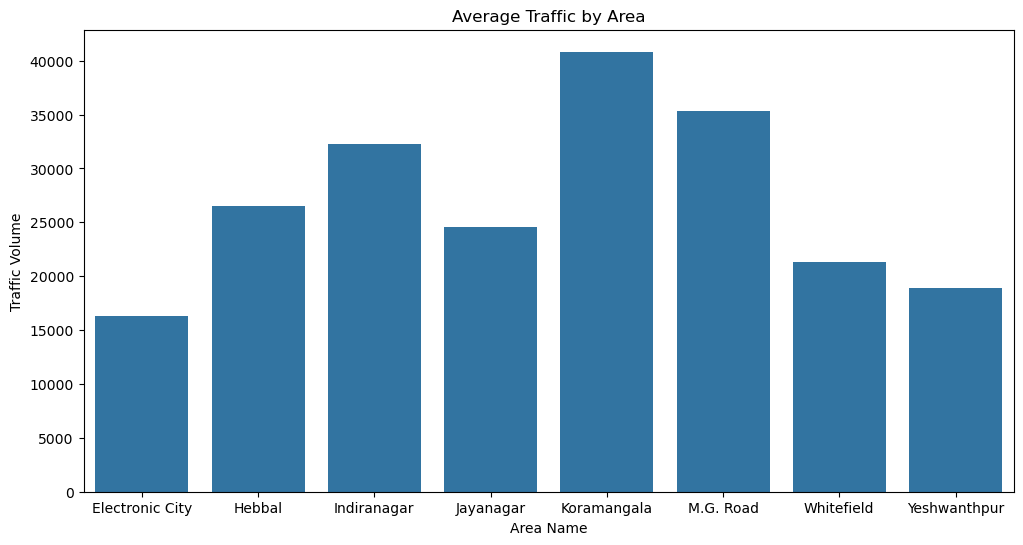

In [20]:
# making a barplot out of obtained results
fig = plt.figure(figsize=(12,6))

sns.barplot(data=traffic_by_area, x='Area Name', y='Traffic Volume')

plt.xlabel('Area Name')
plt.ylabel('Traffic Volume')
plt.title('Average Traffic by Area')


plt.show()

### TRAFFIC SPEED ANALYSIS

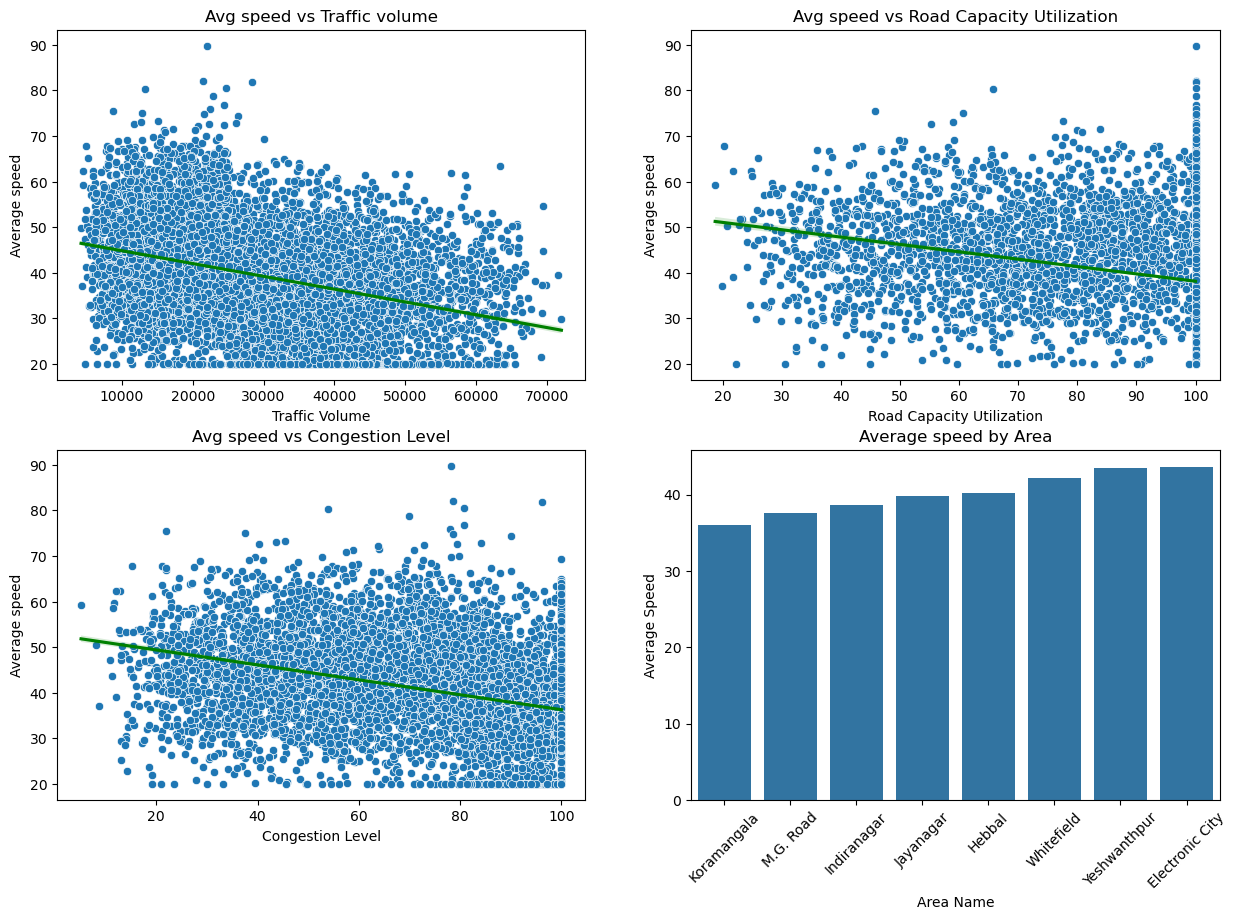

In [21]:

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax1,ax2,ax3,ax4 = ax.flatten()
# traffic volume vs avg speed
sns.scatterplot(data=df, x='Traffic Volume', y='Average Speed',ax = ax1)
#adding a trend line to better understand the corelation
sns.regplot(data=df, x='Traffic Volume', y='Average Speed',scatter= False,color = 'green',ax = ax1)
ax1.set_ylabel('Average speed')
ax1.set_xlabel('Traffic Volume')
ax1.set_title('Avg speed vs Traffic volume')
                                                                                               


#Road Capacity Utilization vs avg speed
sns.scatterplot(data=df, x='Road Capacity Utilization', y='Average Speed',ax = ax2)
#adding a trend line to better understand the corelation
sns.regplot(data=df, x='Road Capacity Utilization', y='Average Speed',scatter= False,color = 'green',ax = ax2)
ax2.set_ylabel('Average speed')
ax2.set_xlabel('Road Capacity Utilization')
ax2.set_title('Avg speed vs Road Capacity Utilization')


#Congestion Level vs avg speed
sns.scatterplot(data=df, x='Congestion Level', y='Average Speed',ax = ax3)
#adding a trend line to better understand the corelation
sns.regplot(data=df, x='Congestion Level', y='Average Speed',scatter= False,color = 'green',ax = ax3)
ax3.set_ylabel('Average speed')
ax3.set_xlabel('Congestion Level')
ax3.set_title('Avg speed vs Congestion Level')


avgspeed_by_area = df.groupby('Area Name')['Average Speed'].mean().reset_index()
avgspeed_by_area.info

sns.barplot(data=avgspeed_by_area, x='Area Name', y='Average Speed',order=avgspeed_by_area.sort_values('Average Speed', ascending=True)['Area Name'],ax=ax4)

ax4.set_xlabel('Area Name')
ax4.set_ylabel('Average Speed')
ax4.set_title('Average speed by Area')
ax4.tick_params(axis='x', rotation=45)
                                                       
                                                                                               



As we can observe average speed exhibits an inverse relationship with traffic volume, road capacity utilization, and congestion levels. This trend aligns with established traffic dynamics, where increased traffic volume and higher road utilization lead to reduced vehicle speeds due to congestion and bottlenecks.
Electronic city followed by Yeshwanthpur has higher average speeds while indiranagar has the least this could be due to road conditions low traffic volume as seen in previous graph. 

### AREA WISE ANALYSIS

Text(0, 0.5, 'Road capacity utilization')

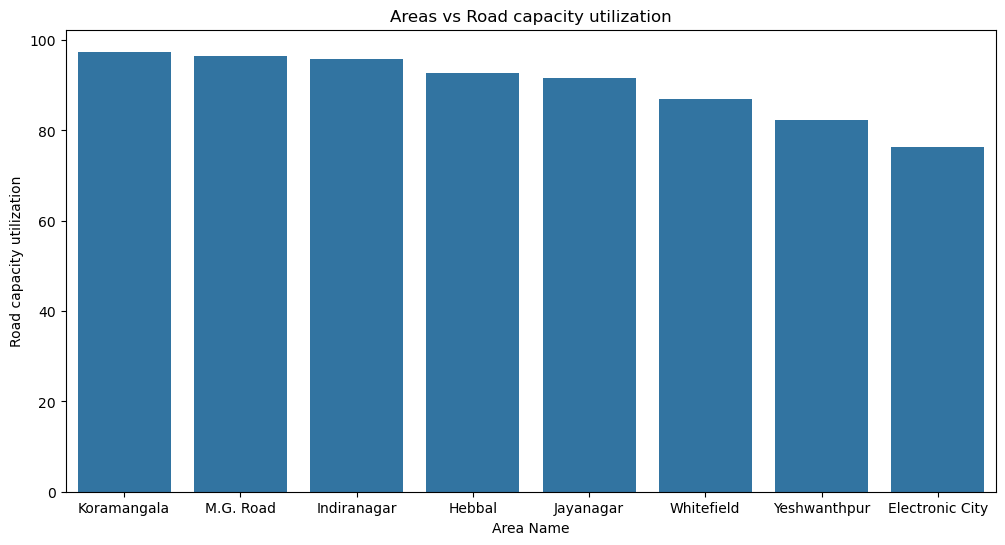

In [22]:
area_utility = df.groupby('Area Name')['Road Capacity Utilization'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=area_utility.index, y=area_utility.values)

plt.title('Areas vs Road capacity utilization')
plt.xlabel('Area Name')
plt.ylabel('Road capacity utilization')


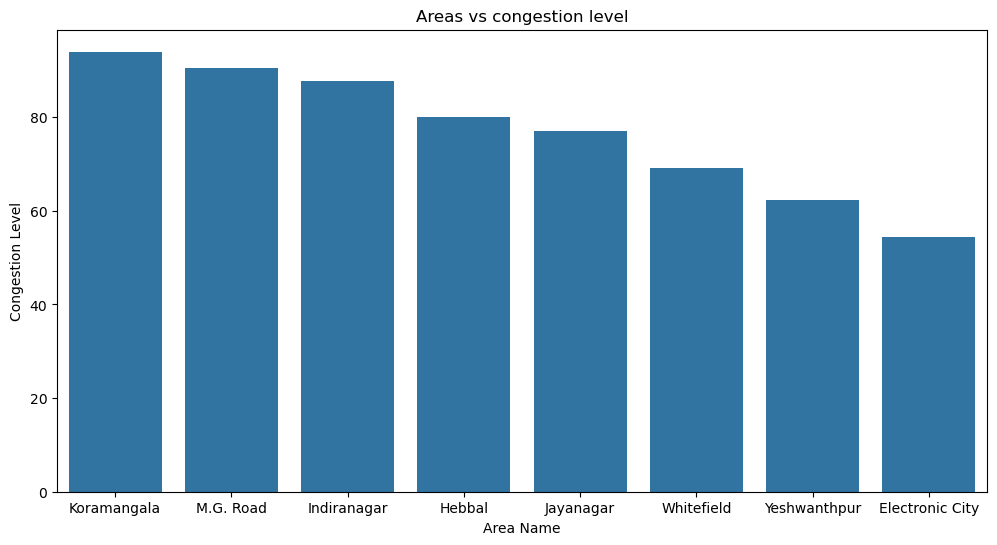

In [24]:
area_stats = df.groupby('Area Name').agg({
    'Traffic Volume': 'mean',
    'Travel Time Index': 'mean',
    'Congestion Level': 'mean'
}).sort_values('Congestion Level', ascending=False)

# Plot most congested intersections
plt.figure(figsize=(12, 6))
sns.barplot(x=area_stats.index, y=area_stats['Congestion Level'])

plt.title('Areas vs congestion level')
plt.xlabel('Area Name')
plt.ylabel('Congestion Level')


plt.show()        

Koramangala was identified as the most congested area, followed by Indiranagar, while Electronic City had the least congestion

<Axes: >

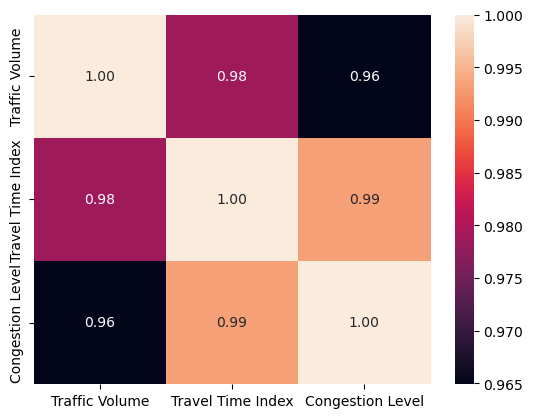

In [25]:
sns.heatmap(area_stats.corr(),annot=True,fmt='.2f')

FROM THE HEAT MAP IT IS EVIDENT THAT THESE THREE FACTORS HAVE STRONG POSITIVE CORRELATION i.e WITH INCREASE IN TRAFFIC VOLUME BOTH TRAVEL TIME AND CONGESTION LEVEL ALSO INCREASES THUS KORUMUGAL

#### INTERSECTION WISE ANALYSIS

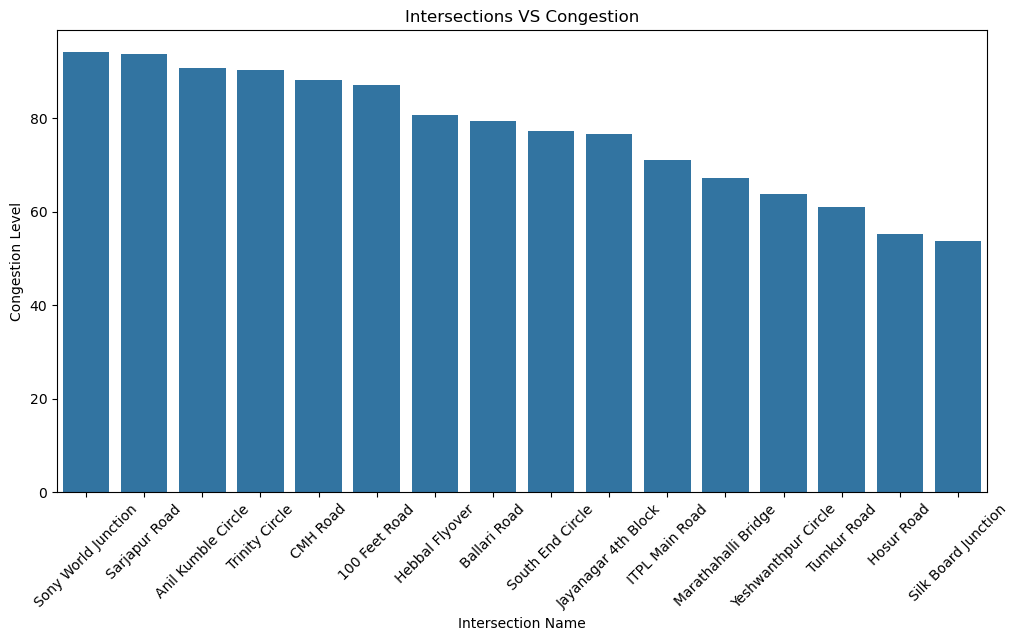

In [26]:
intersection_stats = df.groupby('Road/Intersection Name').agg({
    'Traffic Volume': 'mean',
    'Travel Time Index': 'mean',
    'Congestion Level': 'mean'
}).sort_values('Congestion Level', ascending=False)

# Plot most congested intersections
plt.figure(figsize=(12, 6))
sns.barplot(x=intersection_stats.index, y=intersection_stats['Congestion Level'])
plt.xticks(rotation=45)
plt.title('Intersections VS Congestion')
plt.xlabel('Intersection Name')
plt.ylabel('Congestion Level')
plt.show()        

Sony World Junction and Sarjapur Road were identified as the most congested intersections

### SAFETY ANALYSIS

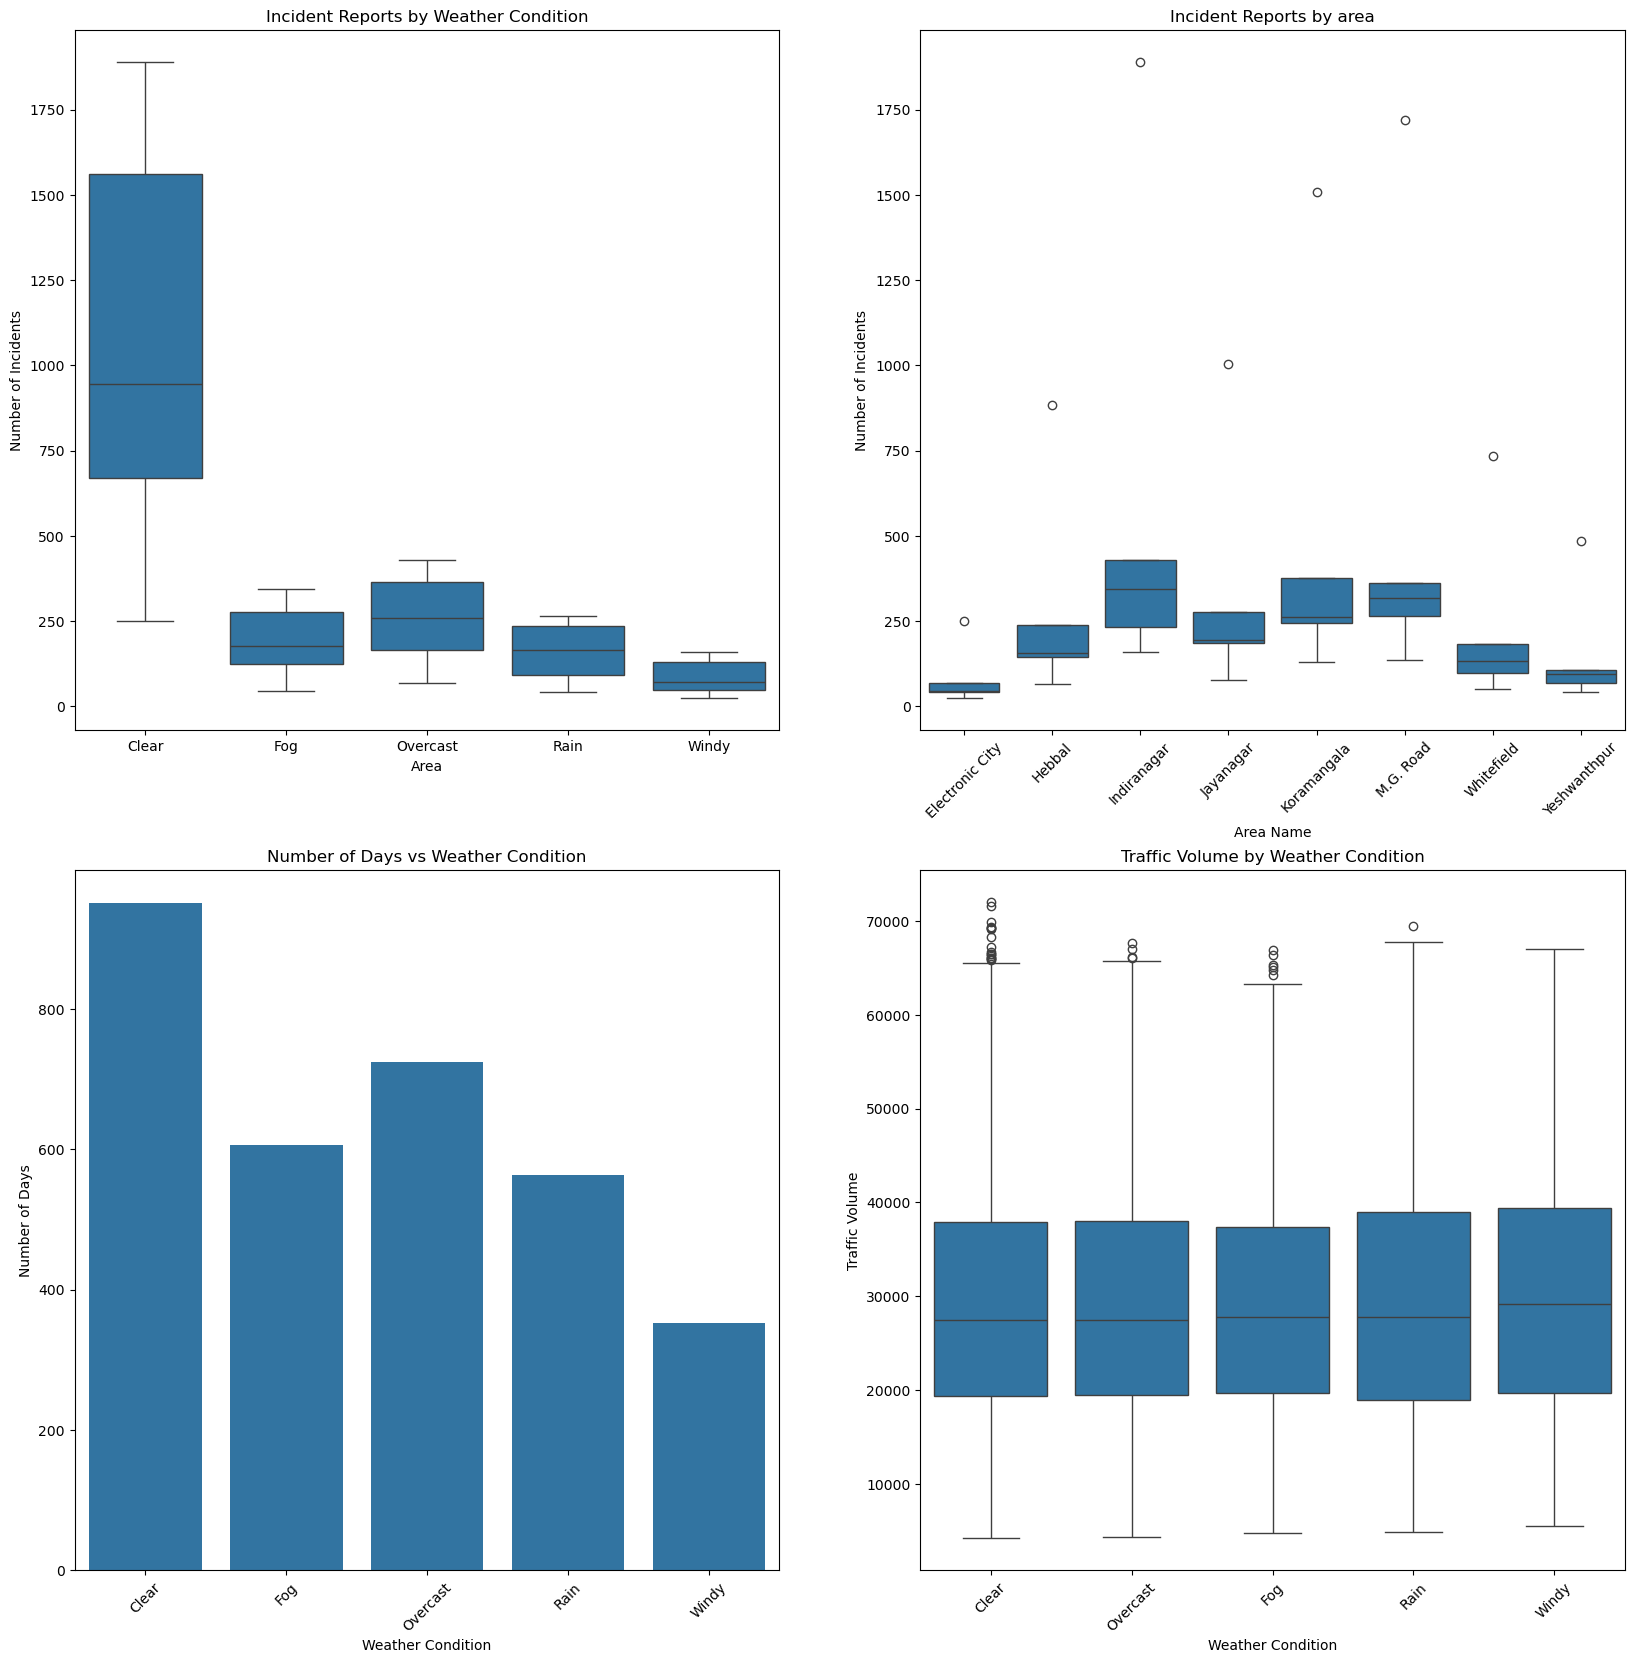

In [27]:

incident_stats = df.groupby(['Area Name', 'Weather Conditions'])['Incident Reports'].sum().reset_index()
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax1,ax2,ax3,ax4= ax.flatten()

# weather impact on incidents
sns.boxplot(x='Weather Conditions', y='Incident Reports', data=incident_stats,ax=ax1)
ax1.set_title('Incident Reports by Weather Condition')
ax1.set_xlabel('Weather Condition')
ax1.set_ylabel('Number of Incidents')

#Incidents in each area
sns.boxplot(x='Area Name', y='Incident Reports', data=incident_stats,ax=ax2)
ax2.set_title('Incident Reports by area')
ax1.set_xlabel('Area')
ax2.set_ylabel('Number of Incidents')
ax2.tick_params(axis='x', rotation=45)



weather_days = df.groupby('Weather Conditions')['Date'].nunique().reset_index()
weather_days.columns = ['Weather Conditions', 'Number of Days']
# Number of Days vs Weather Condition
sns.barplot(x='Weather Conditions', y='Number of Days', data=weather_days, ax=ax3)
ax3.set_title('Number of Days vs Weather Condition')
ax3.set_xlabel('Weather Condition')
ax3.set_ylabel('Number of Days')
ax3.tick_params(axis='x', rotation=45)

# Weather vs Traffic Volume
sns.boxplot(x='Weather Conditions', y='Traffic Volume', data=df, ax=ax4)
ax4.set_title('Traffic Volume by Weather Condition')
ax4.set_xlabel('Weather Condition')
ax4.set_ylabel('Traffic Volume')
ax4.tick_params(axis='x', rotation=45)




Though there's not much traffic volume and favoring weather conditions, many incidents are noted during clear weather, which could be due to the fact that clear weather is experienced more number of days, also due to one's behavioral patterns when the weather is clear. Indiranagar experienced a high number of incidents.This could be due to a combination of factors, including higher traffic density, inadequate road infrastructure, or insufficient traffic enforcement.

#### CHECKING FOR PARKING AVAILABILITY

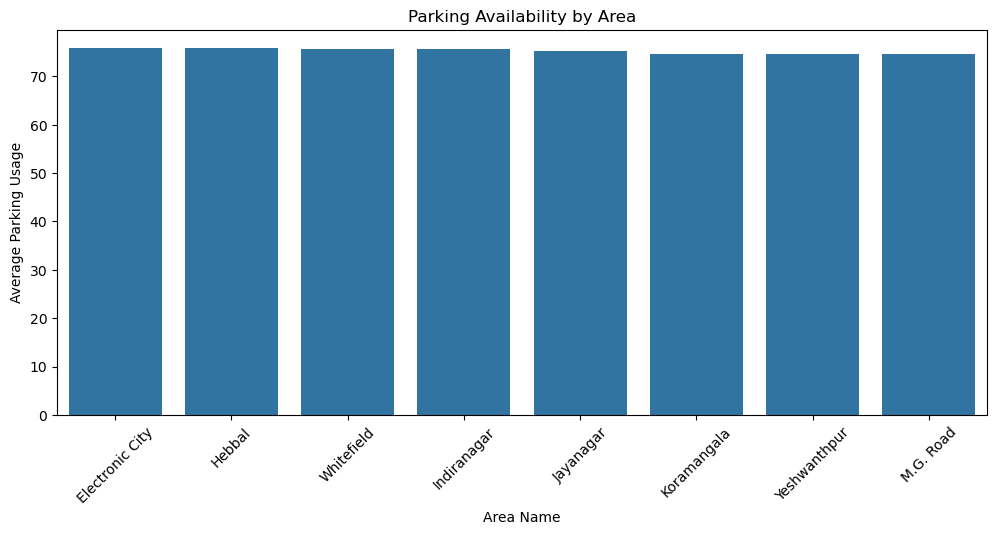

In [28]:
parking= df.groupby('Area Name')['Parking Usage'].mean().sort_values(ascending=False)

# Plot parking availability
plt.figure(figsize=(12, 5))
sns.barplot(x=parking.index, y=parking)
plt.xticks(rotation=45)
plt.title('Parking Availability by Area')
plt.xlabel('Area Name')
plt.ylabel('Average Parking Usage')
plt.show()

Electronic City had the highest parking availability, contributing to its lower congestion levels. Other areas, such as Koramangala and Indiranagar, showed relatively equal parking usage, indicating a need for expanding parking infrastructure in high-traffic zones.

#### Non-Motorized Transport and Pedestrian Activity

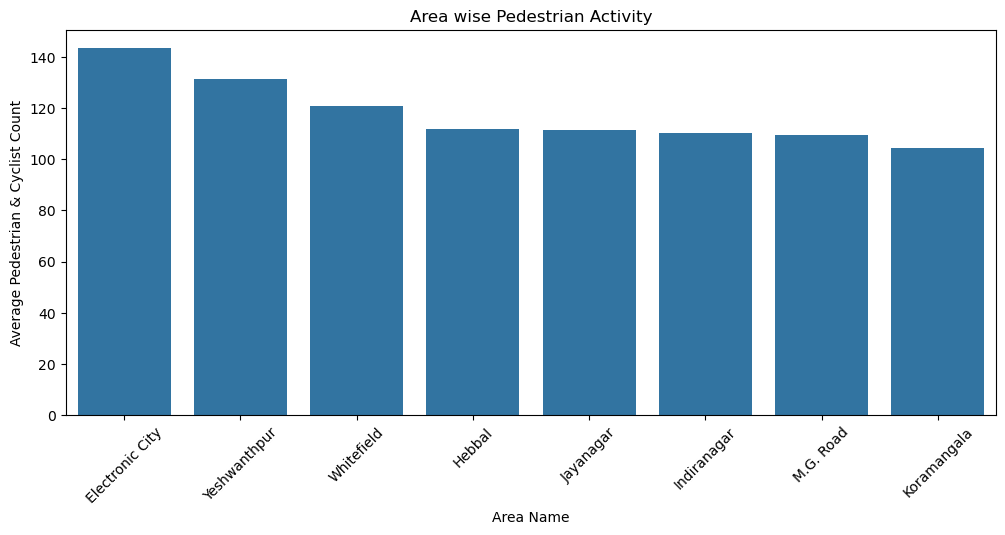

In [29]:
pedestrian= df.groupby('Area Name')['Pedestrian and Cyclist Count'].mean().sort_values(ascending=False)

# pedestrian paths
plt.figure(figsize=(12, 5))
sns.barplot(x=pedestrian.index, y=pedestrian)
plt.xticks(rotation=45)
plt.title('Area wise Pedestrian Activity')
plt.xlabel('Area Name')
plt.ylabel('Average Pedestrian & Cyclist Count')
plt.show()

Electronic City had the highest pedestrian and cyclist activity, which likely contributed to its lower congestion levels and higher average speeds. Promoting non-motorized transport in other areas could help reduce traffic congestion and improve urban mobility.

### Regression analysis


In [41]:
from sklearn.model_selection import train_test_split


In [63]:
# defining x as independent variables and y as  target variable
x = df[['Traffic Volume', 'Travel Time Index', 'Road Capacity Utilization','Public Transport Usage']]
y = df['Congestion Level']

In [64]:
# amking 80% as training data and using the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
x_train

,Traffic Volume,Travel Time Index,Road Capacity Utilization,Public Transport Usage
468,27314,1.500000,100.000000,14.097562
1545,15096,1.375913,75.442777,10.008760
7773,40837,1.500000,100.000000,45.088871
3024,52281,1.500000,100.000000,16.872475
8586,34315,1.500000,100.000000,42.771957
...,...,...,...,...
5734,21257,1.294413,100.000000,26.414072
5191,24806,1.161271,100.000000,55.354697
5390,39967,1.500000,100.000000,45.091219
860,18715,1.233040,93.029054,44.696294


In [66]:
y_train

468      88.591706
1545     48.236736
7773    100.000000
3024    100.000000
8586    100.000000
           ...    
5734     66.368398
5191     82.617338
5390    100.000000
860      55.249534
7270    100.000000
Name: Congestion Level, Length: 7148, dtype: float64

In [79]:
#training the model
from sklearn.linear_model import LinearRegression

In [80]:
#learning model is a linear regression 
mdl = LinearRegression()

In [81]:
mdl.fit(x_train,y_train)

LinearRegression()

In [82]:
#checking the importance of each feature in predicting the target variable
mdl.coef_

array([ 5.46352615e-04,  3.88298484e+01,  7.52389422e-01, -2.02600034e-03])

Based on the coefficients: Traffic Volume has a slight positive impact on congestion,
Travel Time Index has a strong positive impact,
Road Capacity Utilization has a moderate positive impact,
Public Transport Usage has a slight negative impact on congestion levels

In [83]:
cdf = pd.DataFrame(mdl.coef_,x.columns,columns=['Coef'])
cdf.head()

,Coef
Traffic Volume,0.000546
Travel Time Index,38.829848
Road Capacity Utilization,0.752389
Public Transport Usage,-0.002026


In [91]:
#prediction
prediction = mdl.predict(x_test)


Text(0.5, 1.0, 'Model evaluation')

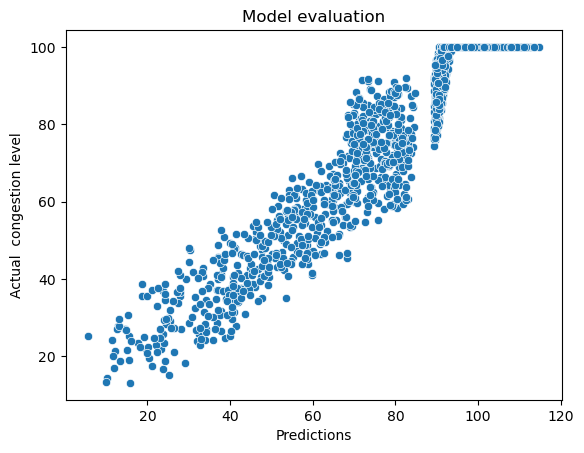

In [101]:
sns.scatterplot(x=prediction, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual  congestion level')
plt.title('Model evaluation')

In [113]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [114]:
print('Mean Absolute Error:',mean_absolute_error(y_test,prediction)) 
print('Mean Squared Error:',mean_squared_error(y_test,prediction))
print('R² Score:', r2_score(y_test,prediction))


Mean Absolute Error: 5.476894550883846
Mean Squared Error: 46.327159578841545
R² Score: 0.9143624581958983


In [105]:
#residuals
residuals = y_test - prediction

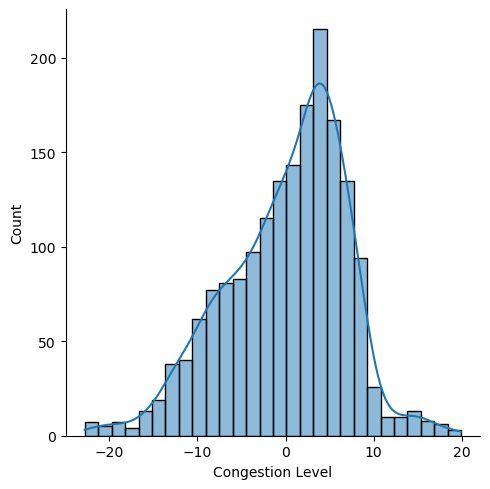

In [109]:
sns.displot(residuals,kde = True)

((array([-3.36150763, -3.10830983, -2.96774337, ...,  2.96774337,
          3.10830983,  3.36150763]),
  array([-22.79730988, -22.68108883, -22.408154  , ...,  19.5686283 ,
          19.69154096,  19.92331401])),
 (6.737524178054555, 0.09167926778838051, 0.9883202457707777))

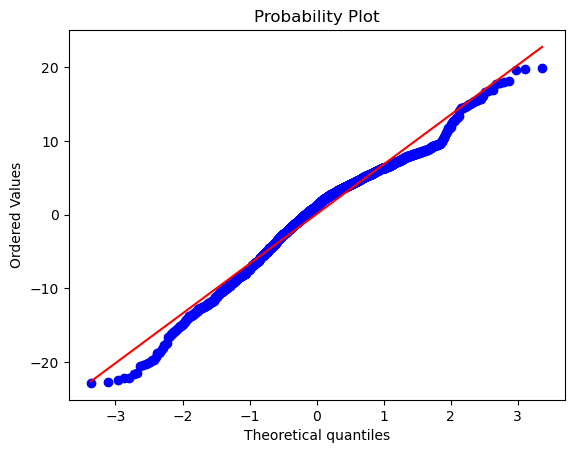

In [112]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm',plot=pylab)

## INSIGHTS

-Wednesday emerged as the day with the highest traffic volume, followed by Thursday and Monday, while Friday recorded the lowest traffic. Traffic volume tends to be slightly higher on weekdays compared to weekends.

-June experienced the highest traffic volume, likely due to seasonal factors such as vacations or increased commercial activity, while January had the lowest traffic.

-A strong positive correlation was observed between traffic volume, travel time, and congestion levels, highlighting the interconnected nature of these factors.

-Koramangala was identified as the most congested area, followed by Indiranagar, while Electronic City had the least congestion. Electronic City also exhibited the highest average speeds, pedestrian activity, and parking availability, contributing to its lower congestion levels.

-Sony World Junction and Sarjapur Road were identified as the most congested intersections, requiring targeted interventions.

-Despite favorable weather conditions, more incidents were reported during clear weather, particularly in Indiranagar, likely due to behavioral patterns and higher exposure.

-The linear regression model effectively predicts congestion levels with a strong R² score of 0.914, indicating that Travel Time Index has the most significant positive impact, while Public Transport Usage slightly reduces congestion.

